In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.
df = pd.read_csv("fcc-forum-pageviews.csv", index_col = 'date')

# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] < df["value"].quantile(0.975))]

print(df.head())

            value
date             
2016-05-19  19736
2016-05-26  18060
2016-05-27  19997
2016-05-28  19044
2016-05-29  20325


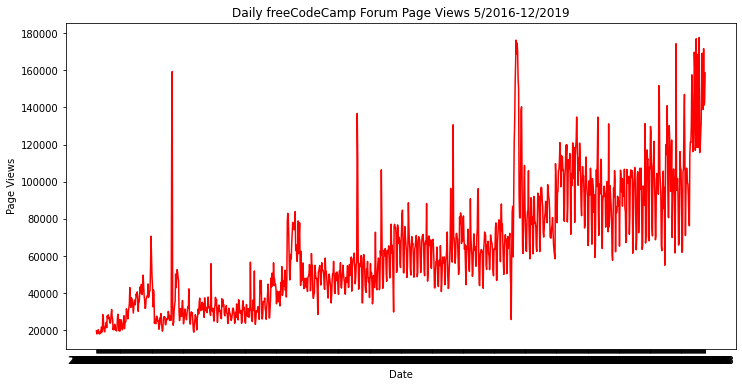

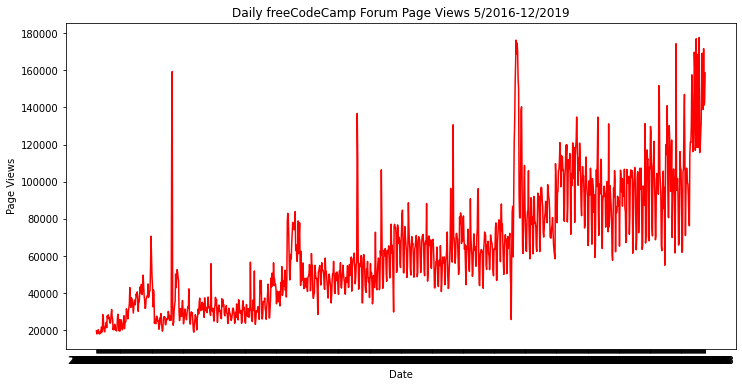

In [26]:
def draw_line_plot():
    # Draw line plot
    fig, axes = plt.subplots(figsize=(12,6))
    axes.plot(df['value'].index, df['value'], color='red')
    axes.set(xlabel='Date', ylabel='Page Views', title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

    # Save image and return fig 
    fig.savefig('line_plot.png')
    return fig

draw_line_plot()

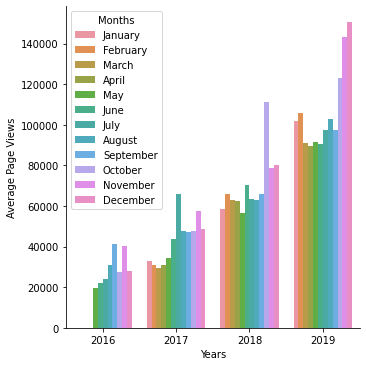

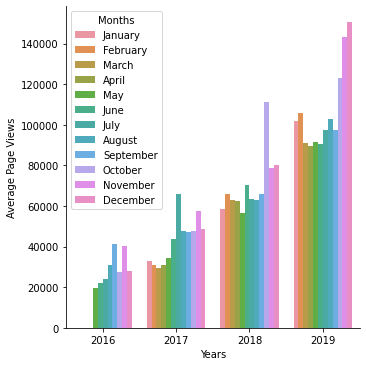

In [29]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = pd.read_csv("fcc-forum-pageviews.csv")
    df_bar = df_bar[(df_bar["value"] >= df_bar["value"].quantile(0.025)) & (df_bar["value"] < df_bar["value"].quantile(0.975))]
    dates = df_bar['date'].str.split(pat='-', expand=True)
    df_bar['Years'] = dates[0]
    df_bar['Months'] = dates[1]
    df_bar['Days'] = dates[2]
    df_bar.loc[df_bar['Months']=='01', 'Months'] = 'January'
    df_bar.loc[df_bar['Months']=='02', 'Months'] = 'February'
    df_bar.loc[df_bar['Months']=='03', 'Months'] = 'March'
    df_bar.loc[df_bar['Months']=='04', 'Months'] = 'April'
    df_bar.loc[df_bar['Months']=='05', 'Months'] = 'May'
    df_bar.loc[df_bar['Months']=='06', 'Months'] = 'June'
    df_bar.loc[df_bar['Months']=='07', 'Months'] = 'July'
    df_bar.loc[df_bar['Months']=='08', 'Months'] = 'August'
    df_bar.loc[df_bar['Months']=='09', 'Months'] = 'September'
    df_bar.loc[df_bar['Months']=='10', 'Months'] = 'October'
    df_bar.loc[df_bar['Months']=='11', 'Months'] = 'November'
    df_bar.loc[df_bar['Months']=='12', 'Months'] = 'December'
    
    # Draw bar plot
    fig = sns.catplot(x="Years", y="value", data = df_bar, kind = "bar", legend=False, hue="Months", ci=None, hue_order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']).fig
    plt.ylabel("Average Page Views")
    plt.legend(loc='upper left', title='Months')

    # Save image and return fig 
    fig.savefig('bar_plot.png')
    return fig

draw_bar_plot()

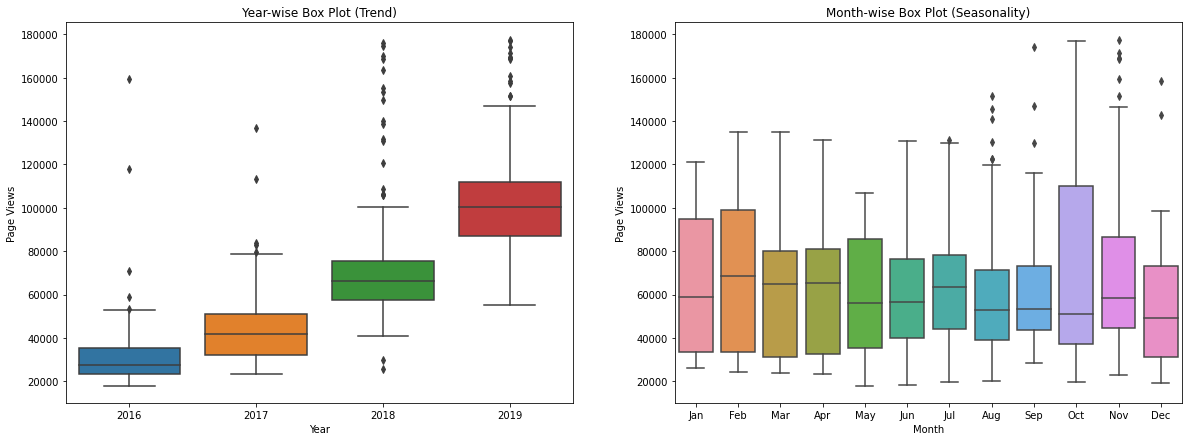

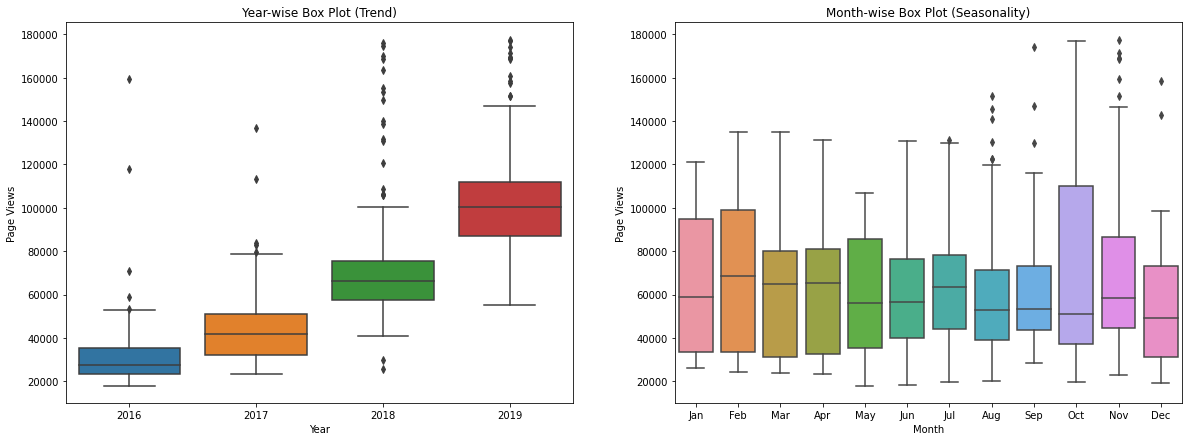

In [33]:
def draw_box_plot():
    # Prepare data for box plots
    df_box = pd.read_csv("fcc-forum-pageviews.csv")
    df_box = df_box[(df_box['value'] <= df_box['value'].quantile(0.975)) & (df_box['value'] >= df_box['value'].quantile(0.025))]
    dates = df_box['date'].str.split(pat='-', expand=True)
    df_box['Year'] = dates[0]
    df_box['Month'] = dates[1]
    df_box.loc[df_box['Month']=='01', 'Month'] = 'Jan'
    df_box.loc[df_box['Month']=='02', 'Month'] = 'Feb'
    df_box.loc[df_box['Month']=='03', 'Month'] = 'Mar'
    df_box.loc[df_box['Month']=='04', 'Month'] = 'Apr'
    df_box.loc[df_box['Month']=='05', 'Month'] = 'May'
    df_box.loc[df_box['Month']=='06', 'Month'] = 'Jun'
    df_box.loc[df_box['Month']=='07', 'Month'] = 'Jul'
    df_box.loc[df_box['Month']=='08', 'Month'] = 'Aug'
    df_box.loc[df_box['Month']=='09', 'Month'] = 'Sep'
    df_box.loc[df_box['Month']=='10', 'Month'] = 'Oct'
    df_box.loc[df_box['Month']=='11', 'Month'] = 'Nov'
    df_box.loc[df_box['Month']=='12', 'Month'] = 'Dec'
    
    # Draw box plots (using Seaborn)
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
    fig1 = sns.boxplot(y='value', x='Year', data=df_box, ax=ax1)
    fig1.set(ylabel = "Page Views", title = "Year-wise Box Plot (Trend)")
    fig2= sns.boxplot(y='value', x='Month', data=df_box, ax=ax2, order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    fig2.set(ylabel = "Page Views", title = "Month-wise Box Plot (Seasonality)")

    # Save image and return fig 
    fig.savefig('box_plot.png')
    return fig

draw_box_plot()